# Abertura do arquivo

Configurações iniciais para iniciar exploração

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import gc
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ajuda a otimizar o uso da memória (mais info: https://www.geeksforgeeks.org/garbage-collection-python/)
gc.enable()

Função para colher 1as impressões do df:

In [3]:
def summary_info_df (df):
    print ("Rows     : " ,df.shape[0])
    print ("Columns  : " ,df.shape[1])
    print ("\nFeatures : \n" ,df.columns.tolist())
    print ("\nMissing values :  ", df.isnull().sum().values.sum())
    print ("\nUnique values :  \n",df.nunique())
    print ("\nData Types :  \n",df.dtypes)

Leitura preliminar dos arquivos

In [4]:
# Abertura do arquivo
from pyxlsb import open_workbook

df = []

with open_workbook('ambev-final-dataset.xlsb') as wb:
     with wb.get_sheet(1) as sheet:
            for row in sheet.rows():
                df.append([item.v for item in row])
                
metas = pd.DataFrame(df[1:], columns=df[0])

In [97]:
metas.head()

,Mês Referência,País,Mundo,Regional/Área,Unidade,Grupo Cargo,Cargo,Grade,Banda,Área,...,% Acum Acumulado,% Ating Fim Exer,% Pontos Fim Exer,% Acum Fim Exer,Status Meta,None,None,None,None,None
0,32017.0,Brasil,Sales,10.0,78.0,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,...,0.0,100.0,100.0,25.0,Monitoramento Aprovado,None,NaN,NaN,NaN,None
1,32017.0,Brasil,Sales,10.0,78.0,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,...,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None
2,32017.0,Brasil,Sales,10.0,78.0,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,...,12.0,100.0,100.0,20.0,Monitoramento Aprovado,None,NaN,NaN,NaN,None
3,32017.0,Brasil,Sales,10.0,78.0,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,...,12.0,100.0,100.0,15.0,Monitoramento Aprovado,None,NaN,NaN,NaN,None
4,32017.0,Brasil,Sales,10.0,78.0,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,...,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None


In [98]:
summary_info_df(metas)

Rows     :  270633
Columns  :  38

Features : 
 ['Mês Referência', 'País', 'Mundo', 'Regional/Á\x81rea', 'Unidade', 'Grupo Cargo', 'Cargo', 'Grade', 'Banda', 'Á\x81rea', 'Nome FuncionÁ¡rio', 'Nome Gestor', 'Código KPI', 'Diretoria', 'Á\x81reas da Diretoria', 'Função', 'Tipo da Meta', 'Categoria KPI', 'Nome KPI', 'Peso KPI', 'Prazo', 'Regra Alcance Parcial', 'Meta Projeto', '% Ating Mês', '% Pontos Mês', '% Acum Mês', '% Ating Acumulado', '% Pontos Acumulado', '% Acum Acumulado', '% Ating Fim Exer', '% Pontos Fim Exer', '% Acum Fim Exer', 'Status Meta', None, None, None, None, None]

Missing values :   3330317

Unique values :  
 Mês Referência             10
País                        9
Mundo                      30
Regional/Área             23
Unidade                   332
Grupo Cargo               140
Cargo                     339
Grade                      17
Banda                      23
Área                     113
Nome FuncionÁ¡rio        7858
Nome Gestor              2005
Cód

# Data Cleaning

Df benchmark para realização das limpezas.

In [5]:
metas_clean = metas.copy()

Renomeação das colunas para otimzar limpeza, e devido a bug estranho impedindo de iterar nomes usando .rename

In [6]:
nome_colunas = [
   'mes', 'pais', 'mundo', 'area_regional', 'unidade',
   'grupo_cargo', 'cargo', 'grade', 'banda', 'area', 'id_funcionario',
   'id_gestor', 'id_kpi', 'diretoria', 'area_diretoria',
   'funcao', 'tipo_meta', 'categoria_kpi', 'nome_kpi', 'peso_kpi',
   'prazo', 'regra_alcance_parcial', 'meta_projeto', 'pct_ating_mes',
   'pct_pts_mes', 'pct_acum_mes', 'pct_ating_acum', 'pct_pts_acumulado',
   'pct_acum_acumulado', 'pct_ating_fim_exer', 'pct_pts_fim_exer',
   'pct_acum_fim_exer', 'status_meta', 'c33', 'c34', 'c35', 'c36', 'c37']

metas_clean.columns = nome_colunas

Sequência de transformações para remover últimas colunas defeituosas e reduzir a informação nas remanescentes.

In [7]:
# Trocar todos os valores None por 'nan'
metas_clean.fillna(value=np.nan, inplace=True)  

# Selecionar as linhas problemáticas que são aquelas com valores nas colunas 34 em diante
linhas_com_problema = metas_clean[metas_clean.iloc[:,33].notna()]

# Correção das linhas com 5 campos problematicos no campo 'regra parcial'
linhas_consertadas_1 = linhas_com_problema[linhas_com_problema.iloc[:,-1].notna()].copy()
for i in range(len(linhas_consertadas_1)):
    regra = ''
    for j in range(21,27):
        regra += str(linhas_consertadas_1.iloc[i,j]) + " "
    linhas_consertadas_1.iloc[i,21] = regra
    
    for j in range(22,33):
        linhas_consertadas_1.iloc[i,j] = linhas_consertadas_1.iloc[i,j+5]
linhas_consertadas_1.c37 = np.nan

# Correção das linhas com 2 campos problematicos no campo 'regra parcial'  
linhas_consertadas_2 = linhas_com_problema.iloc[[2],:].copy()
linhas_consertadas_2.iloc[0,21]  = linhas_consertadas_2.iloc[0,21] + " " + linhas_consertadas_2.iloc[0,22]
for i in range(22,33):
    linhas_consertadas_2.iloc[0,i] = linhas_consertadas_2.iloc[0,i+1]
linhas_consertadas_2.c37 = np.nan

# Correção das linhas da diretoria do Panamá
linhas_consertadas_3 = linhas_com_problema.iloc[3:,:].copy()
for i in range(len(linhas_consertadas_3)):
   
    # Consertar coluna 'regra parcial'
    regra = ''
    for j in range(21,25):
        regra += str(linhas_consertadas_3.iloc[i,j]) + " "
    
    linhas_consertadas_3.iloc[i,21] = regra
    linhas_consertadas_3.iloc[i,22] = 0 # Assumi-se como falso a meta projeto
    linhas_consertadas_3.iloc[i,23] = np.nan
    linhas_consertadas_3.iloc[i,24] = np.nan
    linhas_consertadas_3.iloc[i,25] = np.nan

    for j in range(27,32):
        linhas_consertadas_3.iloc[i,j] = linhas_consertadas_3.iloc[i,j+3]
    
    linhas_consertadas_3.iloc[i,1] = 'Panama' # Padroniza o nome
    linhas_consertadas_3.iloc[i,13] = 'Diretoria Internacional' # Coloca um nome para diferenciar a diretoria
    linhas_consertadas_3.iloc[i,32] = np.nan
    
linhas_consertadas_3.c37 = np.nan

# Remover as linhas formatadas incorretamente 
metas_clean.drop(metas_clean[metas_clean.iloc[:,33].notna()].index, inplace=True)

# Inserir linhas consertadas no dataframe
metas_clean = pd.concat([metas_clean,linhas_consertadas_1,linhas_consertadas_2,linhas_consertadas_3], axis=0, 
                         join='outer', ignore_index=False)

# Remover colunas extraídas que não deveriam ter vindo junto devido a má formatação de algumas linhas`
cols_to_delete = [33,34,35,36,37]
metas_clean.drop(metas_clean.columns[cols_to_delete],axis=1,inplace=True)

# Remover linhas duplicadas
metas_clean.drop_duplicates(subset=None, keep='first', inplace=True)

# deletar dados que não serao mais usados
del([linhas_com_problema,
     linhas_consertadas_1,
     linhas_consertadas_2,
     linhas_consertadas_3,
     i,j,regra])

Dicionário para correção dos erros de encoding.

In [8]:
# Dicionário para correcao de caracteres
char_conversion = {'Á':'A','ã':'A', "Á¡":"a","Á":"A","Ã! ":"C", 'a':'a',
                   "Ã":"A",'A"':"O","Â":"","A©":'e',"A¡":"a",
                   "§A":"c","A¢":"a","Aµ":"o",
                   "Ê":"E","É":"E","ê":"e",'é':'e','A`':"e",
                   "Í":"I","í":"i",'A':"i",
                   '0':'O','Ó':'O',"ó":"o",'':'o',
                   'ç':'C','Ç':"C",
                   "":"","": "","":"O","£":"","_xOOOD_":" ","â¬":"",
                   "_xOOOB_":" ","\x01O":"","A\x1c ":"O","A\x1d ": "O",
                   }

Looping para correção 

In [9]:
str_clean = ['pais', 'mundo', 'grupo_cargo', 'cargo', 'area', 'diretoria', 'funcao', 'tipo_meta', 'categoria_kpi', 
             'regra_alcance_parcial']
for feature in str_clean:
    metas_clean[feature].replace(char_conversion, regex=True, inplace = True)
    metas_clean[feature] = metas_clean[feature].str.upper()

Correções específicas de carácter, principalmente na variável prazo.

In [10]:
# Coluna "Mundo"
metas_clean['mundo'].replace({"HILA*.*Suministro" : "HILA - Suministro"}, regex=True, inplace = True)

# Coluna "Grupo Cargo"
metas_clean['grupo_cargo'].replace({"GCORP LABORATA.*" : "GCORP LABORATORIO CENTRAL"}, regex=True, inplace = True)

# Coluna "Prazo"
metas_clean['prazo'].replace({ 43100.0     : "12/31/2017 12:00:00 AM",
                                   '31.12.17'   : "12/31/2017 12:00:00 AM",
                                   '31.12.2017' : "12/31/2017 12:00:00 AM",
                                   '30.12.2017' : "12/31/2017 12:00:00 AM",
                                   '30.06.2017' : "06/30/2017 12:00:00 AM",
                                   '31.10.2017' : "10/31/2017 12:00:00 AM",
                                   '30.11.2017' : "11/30/2017 12:00:00 AM",
                                    43070.0     : "12/01/2017 12:00:00 AM",
                                   '31.0'       : "12/01/2017 12:00:00 AM",
                                     31.0       : "12/01/2017 12:00:00 AM",
                                   '31.07.2017' : "07/31/2017 12:00:00 AM",
                                    42747.0     : "01/12/2017 12:00:00 AM",
                                   '30.08.2017' : "08/30/2017 12:00:00 AM",
                                    42346.0     : "12/08/2015 12:00:00 AM",
                                    42228.0     : '08/12/2015 12:00:00 AM',
                                   '30.09.2017' : '09/30/2017 12:00:00 AM',
                                    43039.0     : "10/31/2017 12:00:00 AM",
                                   '30.11.17'   : "11/30/2017 12:00:00 AM",
                                    42825.0     : "03/31/2017 12:00:00 AM",
                                    42766.0     : "01/31/2017 12:00:00 AM",
                                    42736.0     : "01/01/2017 12:00:00 AM",
                                    42916.0     : "06/30/2017 12:00:00 AM",
                                    42978.0     : "08/31/2017 12:00:00 AM",
                                    43059.0     : "11/20/2017 12:00:00 AM",
                                    '12/01/2017 12:00:00 AM7.2017': '12/01/2017 12:00:00 AM',
                                    'monthly basis': 'monthly',
                                    'Monthly basis': 'monthly',
                                    'monthly'      : 'monthly',
                                    'Monthly'      : 'monthly',
                                    'monthly and quarterly basis' : 'monthly and quarterly'
                                   }, regex=True, inplace = True) # Corrigir datas incorretamente formatadas

Mudanças nos dtypes:
- mes, area_regional, unidade, grade, id_funcionario, id_gestor, nome_kpi -> integer
- prazo -> date
- pct_ating_mes:pct_acum_fim_exer -> int/float

Para transformar em date, teria de excluir categorias diferente de prazo. Explorarei isso melhor abaixo para ver qual será a melhor abordagem.

In [42]:
pd.to_datetime(metas_clean.prazo, errors ='ignore').unique()

array(['12/31/2017 12:00:00 AM', '01/12/2017 12:00:00 AM',
       '10/31/2017 12:00:00 AM', '1/30/1900 12:00:00 AM',
       '08/12/2015 12:00:00 AM', '1/31/2017 12:00:00 AM',
       '5/31/2017 12:00:00 AM', '3/31/2017 12:00:00 AM',
       '6/30/2017 12:00:00 AM', '12/01/2017 12:00:00 AM',
       '03/31/2017 12:00:00 AM', '12/08/2015 12:00:00 AM',
       '06/30/2017 12:00:00 AM', '01/31/2017 12:00:00 AM',
       '11/20/2017 12:00:00 AM', '08/31/2017 12:00:00 AM',
       '01/01/2017 12:00:00 AM', 'monthly', '11/30/2017 12:00:00 AM',
       'FY', nan, '08/30/2017 12:00:00 AM', 'monthly and quarterly',
       'TBD', 'July', '09/30/2017 12:00:00 AM'], dtype=object)

In [77]:
summary_info_df(metas_clean)

Rows     :  267550
Columns  :  33

Features : 
 ['mes', 'pais', 'mundo', 'area_regional', 'unidade', 'grupo_cargo', 'cargo', 'grade', 'banda', 'area', 'id_funcionario', 'id_gestor', 'id_kpi', 'diretoria', 'area_diretoria', 'funcao', 'tipo_meta', 'categoria_kpi', 'nome_kpi', 'peso_kpi', 'prazo', 'regra_alcance_parcial', 'meta_projeto', 'pct_ating_mes', 'pct_pts_mes', 'pct_acum_mes', 'pct_ating_acum', 'pct_pts_acumulado', 'pct_acum_acumulado', 'pct_ating_fim_exer', 'pct_pts_fim_exer', 'pct_acum_fim_exer', 'status_meta']

Missing values :   1953652

Unique values :  
 mes                        10
pais                        8
mundo                      30
area_regional              23
unidade                   332
grupo_cargo               139
cargo                     318
grade                      17
banda                      23
area                      105
id_funcionario           7858
id_gestor                2005
id_kpi                   3491
diretoria                  15
area_dir

### Escolha da váriavel alvo

Separações das variáveis pct.

In [14]:
pts = metas_clean.iloc[:, 23:32]
pts.nunique()

pct_ating_mes          4
pct_pts_mes            4
pct_acum_mes          17
pct_ating_acum         4
pct_pts_acumulado      4
pct_acum_acumulado    20
pct_ating_fim_exer     6
pct_pts_fim_exer       4
pct_acum_fim_exer     21
dtype: int64

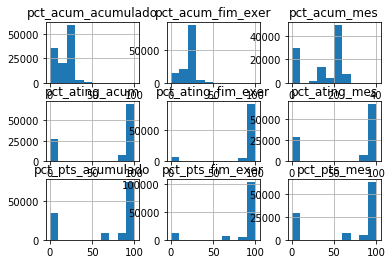

In [31]:
pts.hist()
plt.show()

In [68]:
pts.describe()

,pct_ating_mes,pct_pts_mes,pct_acum_mes,pct_ating_acum,pct_pts_acumulado,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer
count,105212.000000,105212.000000,105212.000000,105630.000000,128095.000000,119474.000000,105683.000000,128118.000000,130312.000000
mean,70.143045,68.280044,13.684123,71.919152,68.394551,13.979293,92.193920,87.853229,17.955537
std,44.045907,43.835158,9.032698,42.947980,43.334133,9.835731,24.305855,29.432019,7.624180
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,16.000000
50%,100.000000,100.000000,20.000000,100.000000,100.000000,20.000000,100.000000,100.000000,20.000000
75%,100.000000,100.000000,20.000000,100.000000,100.000000,20.000000,100.000000,100.000000,20.000000
max,100.000000,100.000000,40.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


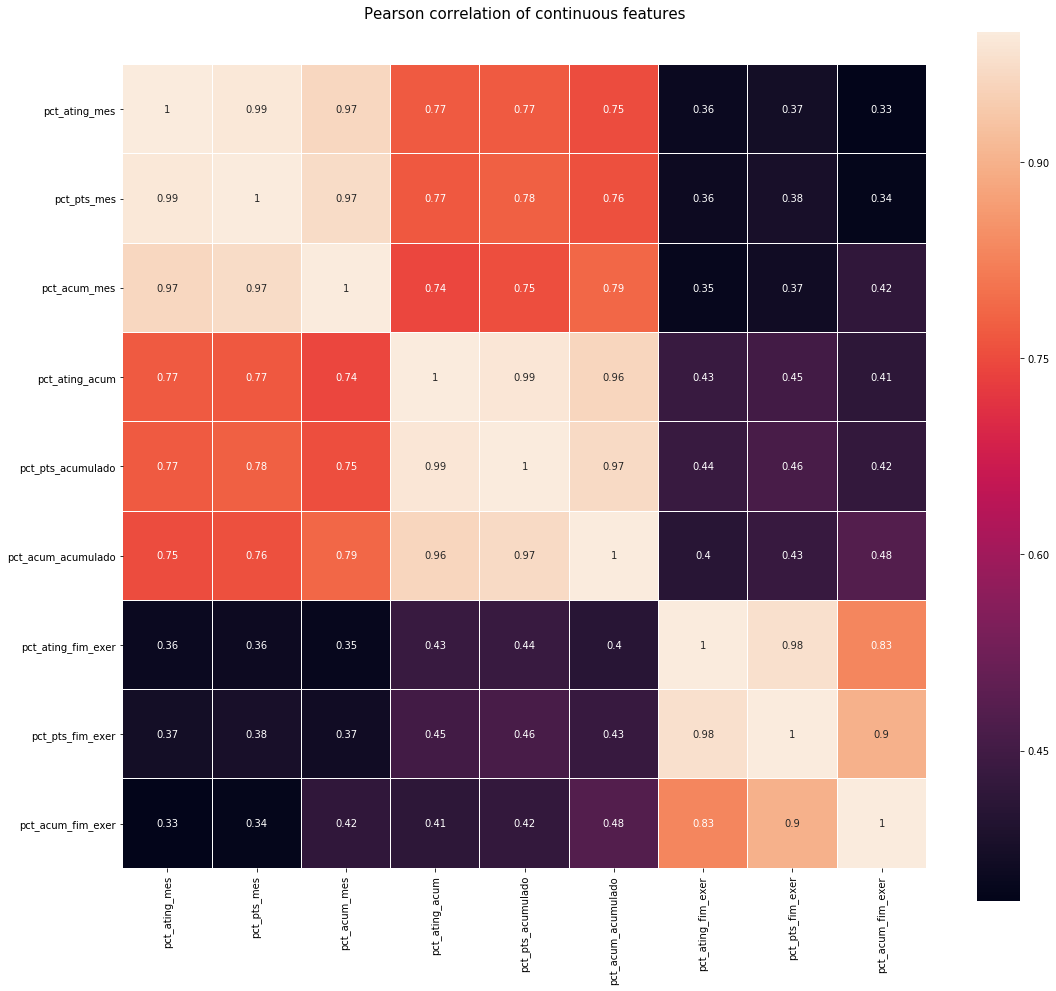

In [30]:
plt.figure(figsize=(18,16))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(pts_clean.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

In [15]:
metas_clean2 = metas_clean.loc[pts.pct_ating_fim_exer.dropna().index, :]
metas_clean2.reset_index(inplace=True)

### 9,13 e 14

Área: pode-se perceber a distribuição extremamente desigual de kpis entre as áreas. Pode ser interessante fazer uma segmentação de entre áres com muito, médios e pouco kpis para ver se há correlação com performance.

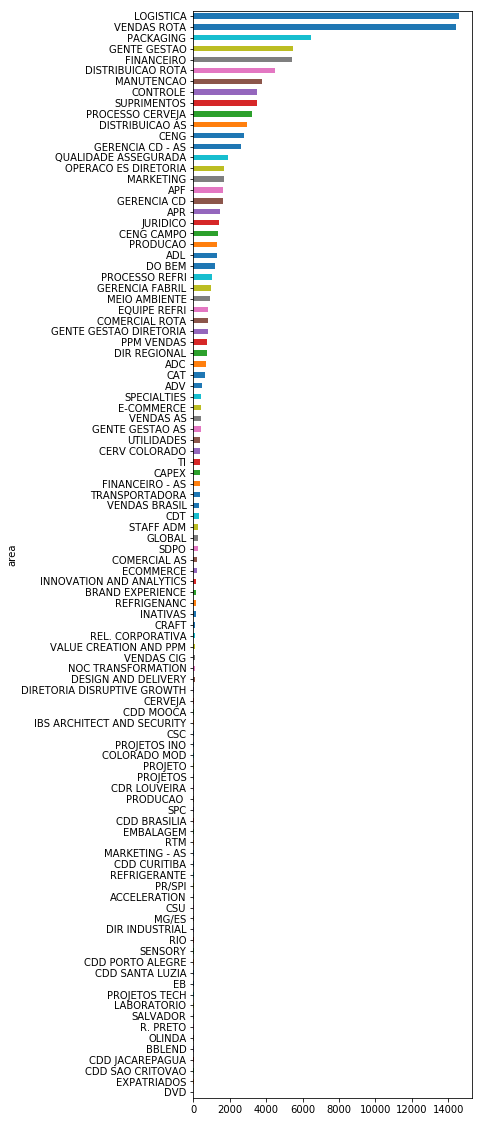

In [92]:
plt.figure(figsize=(5,20))
metas_clean2.groupby(['area']).id_kpi.count().sort_values().plot(kind='barh')

Novas features para captar interação entre area e unidade em relação à quantidade de kpis.

In [16]:
kpi_area = metas_clean2.groupby(['area']).id_kpi.count()
f_kpi_area = metas_clean2[['area']].join(kpi_area, on = 'area', how = 'left')
f_kpi_area.columns = ['area', 'kpi_area']
f_kpi_area.drop('area', axis = 1, inplace=True)

In [17]:
kpi_unidade = metas_clean2.groupby(['unidade']).id_kpi.count()
f_kpi_unidade = metas_clean2[['unidade']].join(kpi_unidade, on = 'unidade', how = 'left')
f_kpi_unidade.columns = ['unidade', 'kpi_unidade']
f_kpi_unidade.drop('unidade', axis = 1, inplace=True)

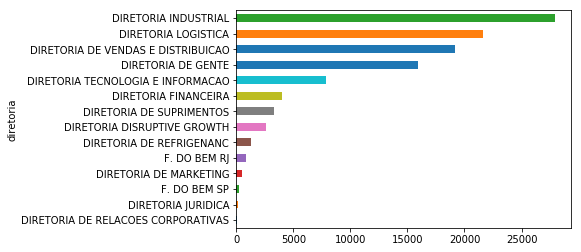

In [96]:
metas_clean2.groupby(['diretoria']).id_kpi.count().sort_values().plot(kind='barh')

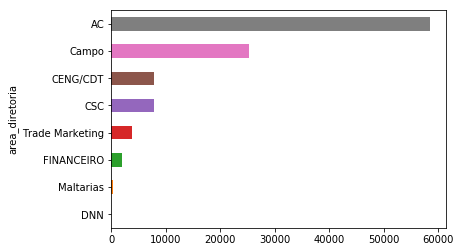

In [97]:
metas_clean2.groupby(['area_diretoria']).id_kpi.count().sort_values().plot(kind='barh')

### 15:17 e 19

Predominância muito maior de metas MANDATORIO, seguido de GENÉRICO.

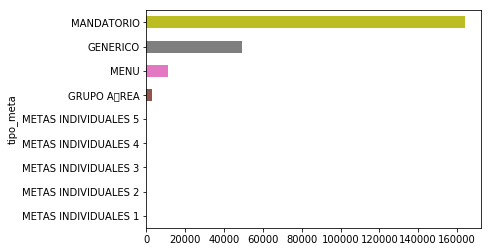

In [71]:
metas_clean2.groupby(['tipo_meta']).id_kpi.count().sort_values().plot(kind='barh')

Pesos padrões das kpis: 20, 15 e 25

# Modelo

In [39]:
metas_targ = metas_clean2['pct_ating_fim_exer']

In [40]:
metas_targ = metas_targ.astype('category')

In [41]:
metas_targ_ohe = pd.get_dummies(metas_targ)

### Numeric Data

In [54]:
metas_num = metas_clean2.loc[:, [bool('_acum_' in string) for string in metas_clean2]]
metas_num = pd.concat([metas_num, f_kpi_area, f_kpi_unidade], axis = 1)

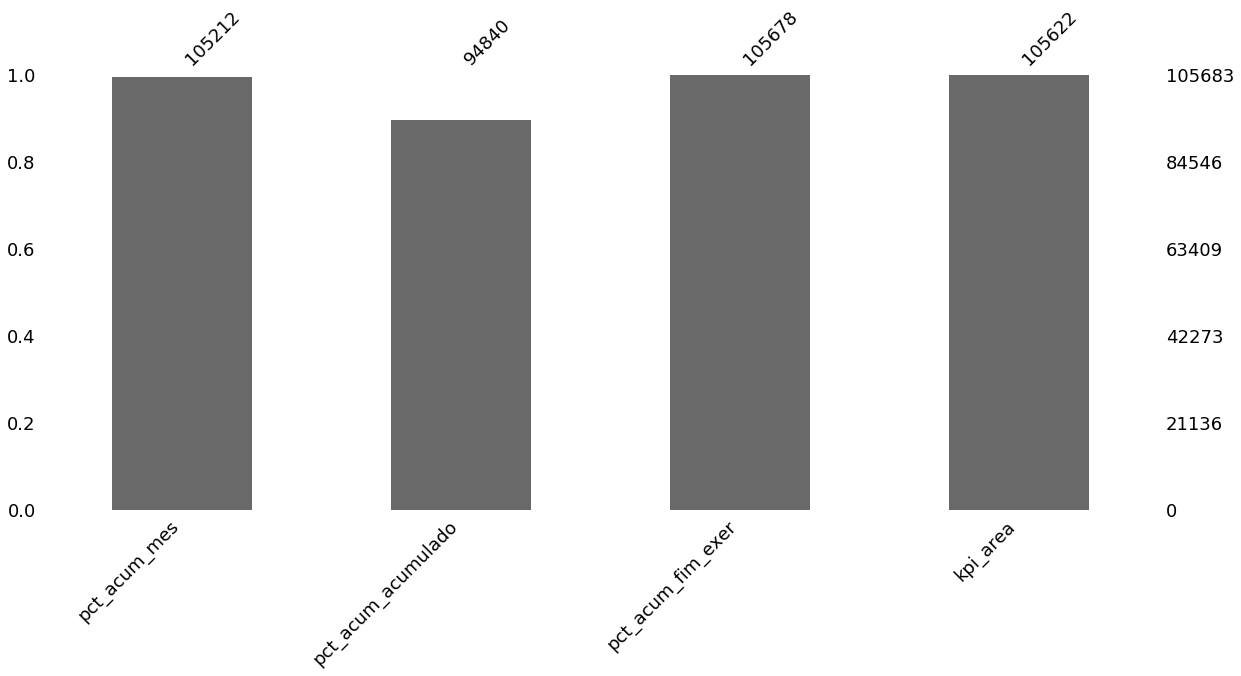

In [55]:
# colunas com missing values
missingValueColumns = metas_num.columns[metas_num.isnull().any()].tolist()
metas_num_null = metas_num[missingValueColumns] 
msno.bar(metas_num_null,figsize=(20,8),fontsize=18,labels=True)

Como há menos de 

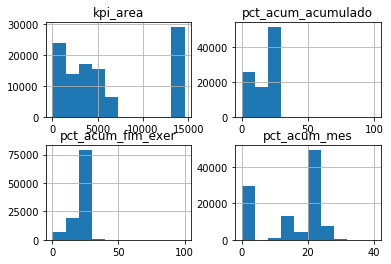

In [56]:
metas_num_null.hist()
plt.show()

In [57]:
import statistics 

for feature in missingValueColumns:
    metas_num[feature] = metas_num[feature].fillna(statistics.median(metas_num[feature]))

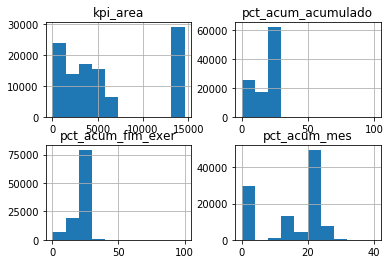

In [28]:
metas_num.loc[:, metas_num_null.columns].hist()
plt.show()

### Categorical Data

In [61]:
catVars = ['mes', 'pais', 'mundo', 'area_regional', 'grade', 'banda', 
           'diretoria', 'area_diretoria', 'tipo_meta', 'peso_kpi', 
           'meta_projeto', 'pct_ating_mes', 'pct_pts_mes','pct_ating_acum', 
           'pct_pts_acumulado', 'pct_pts_fim_exer','status_meta']
metas_cat = metas_clean2.loc[:, catVars]

In [68]:
metas_cat_ohe = pd.get_dummies(metas_cat.apply(lambda x: x.astype('category'), axis=0))

### Text Data

In [104]:
textVars = ['grupo_cargo', 'cargo', 'funcao', 'categoria_kpi']
metas_text = metas_clean2.loc[:, textVars]

In [108]:
# Define combine_text_columns()
def combine_text_columns(data_frame):
    """ converts all text in each row of data_frame to single vector """
    
    # Replace nans with blanks
    data_frame.fillna('', inplace = True)
    
    # Join all text items in a row that have a space in between
    return data_frame.apply(lambda x: " ".join(x), axis=1)

In [109]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern = TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern = TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(metas_text)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 320 tokens in the dataset
There are 283 alpha-numeric tokens in the dataset


# Modelo

In [69]:
metas_x = pd.concat([metas_num, metas_cat_ohe], axis = 1)

In [70]:
metas_x

,pct_acum_mes,pct_acum_acumulado,pct_acum_fim_exer,kpi_area,kpi_unidade,mes_32017.0,mes_42017.0,mes_52017.0,mes_62017.0,mes_72017.0,...,pct_pts_acumulado_100.0,pct_pts_fim_exer_0.0,pct_pts_fim_exer_60.0,pct_pts_fim_exer_80.0,pct_pts_fim_exer_100.0,status_meta_0.0,status_meta_12.0,status_meta_16.0,status_meta_20.0,status_meta_Monitoramento Aprovado
0,0.0,0.0,25.0,1611.0,534,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,12.0,12.0,20.0,1611.0,534,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,15.0,12.0,15.0,1611.0,534,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,20.0,20.0,20.0,1284.0,485,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,20.0,20.0,20.0,1284.0,485,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5,0.0,0.0,25.0,1284.0,485,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,0.0,0.0,25.0,1626.0,1626,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7,20.0,20.0,20.0,1626.0,1626,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
8,20.0,20.0,20.0,1360.0,48,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
9,20.0,20.0,20.0,1360.0,48,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [72]:
# Import do módulo
from sklearn import model_selection

## Função para comparação
def compara_cv_modelos (X, y, modelos, num_folds = 3, seed = 666):
    # Avaliando cada modelo
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)  
        cv_results = model_selection.cross_val_score(modelo, X, y, cv = kfold)
        resultados.append(cv_results)
        nomes.append(nome)
        msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
        print(msg)
   # Boxplot para comparar os algoritmos
    fig = plt.figure()
    fig.suptitle('Comparação de Algoritmos de Classificação')
    ax = fig.add_subplot(111)
    plt.boxplot(resultados)
    ax.set_xticklabels(nomes)
    plt.show() 

In [73]:
## Classificação

# Import dos módulos
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Preparando os modelo
modelos_cla = []
modelos_cla.append(('RF', RandomForestClassifier()))
modelos_cla.append(('XGB', XGBClassifier()))

In [74]:
compara_cv_modelos(metas_x, metas_targ_ohe, modelos_cla)

RF: 0.999375 (0.000843)


ValueError: bad input shape (70455, 6)